In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.14.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.19.0


In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC()
svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print('테스트 점수: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.951


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도: {:.3f}'.format(grid.best_score_))
print('테스트 세트 점수: {:.3f}'.format(grid.score(X_test_scaled, y_test)))
print('최적의 매개변수: ', grid.best_params_)

최상의 교차 검증 정확도: 0.981
테스트 세트 점수: 0.972
최적의 매개변수:  {'C': 1, 'gamma': 1}


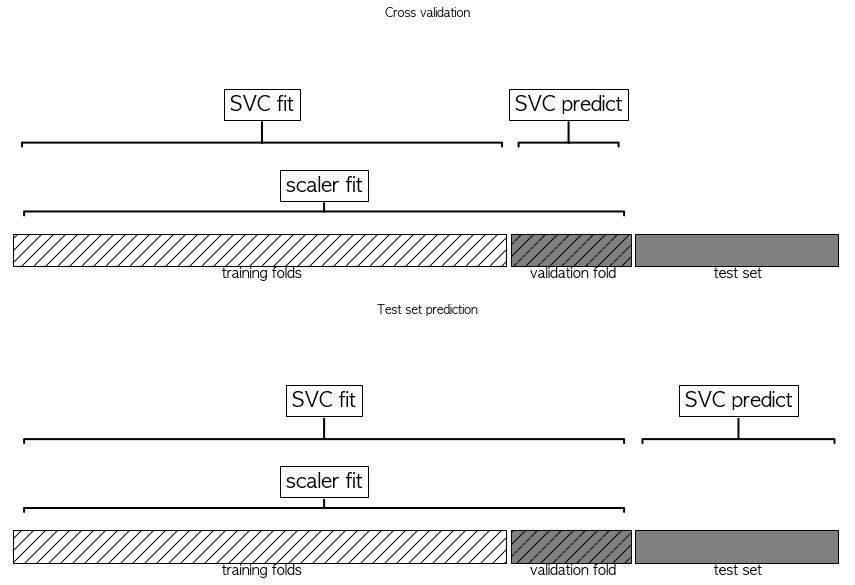

In [4]:
mglearn.plots.plot_improper_processing()

In [5]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)

print('테스트 점수: {:.3f}'.format(pipe.score(X_test, y_test)))

테스트 점수: 0.951


In [7]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('최상의 교차 검증 정확도: {:.3f}'.format(grid.best_score_))
print('테스트 세트 점수: {:.3f}'.format(grid.score(X_test, y_test)))
print('최적의 매개변수: {}'.format(grid.best_params_))

최상의 교차 검증 정확도: 0.981
테스트 세트 점수: 0.972
최적의 매개변수: {'svm__gamma': 1, 'svm__C': 1}


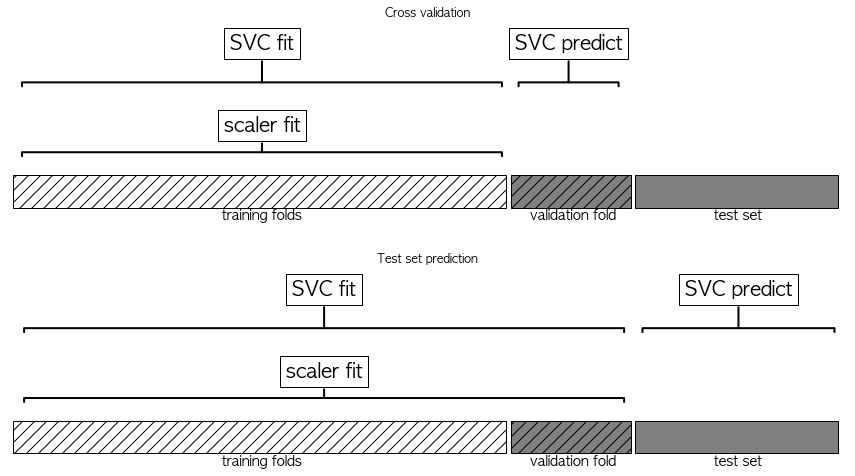

In [8]:
mglearn.plots.plot_proper_processing()

In [9]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [10]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print('X_selected.shape: {}'.format(X_selected.shape))

X_selected.shape: (100, 500)


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print('교차 검증 정확도 (릿지): {:.3f}'.format(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

교차 검증 정확도 (릿지): 0.906


In [12]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)),
                ('ridge', Ridge())])
print('교차 검증 정확도 (파이프라인): {:.3f}'.format(np.mean(cross_val_score(pipe, X, y, cv=5))))

교차 검증 정확도 (파이프라인): -0.247


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/skle

In [13]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [14]:
print('파이프라인 단계:\n{}'.format(pipe_short.steps))

파이프라인 단계:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print('파이프라인 단계:\n{}'.format(pipe.steps))

파이프라인 단계:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [16]:
pipe.fit(cancer.data)
components = pipe.named_steps['pca'].components_
print('components.shape: {}'.format(components.shape))

components.shape: (2, 30)


In [17]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print('최상의 모델:\n{}'.format(grid.best_estimator_))

최상의 모델:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [18]:
print('로지스틱 회귀 단계:\n{}'.format(grid.best_estimator_.named_steps['logisticregression']))

로지스틱 회귀 단계:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [19]:
print('로지스틱 회귀 계수:\n{}'.format(grid.best_estimator_.named_steps['logisticregression'].coef_))

로지스틱 회귀 계수:
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


In [20]:
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
             'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'polynomialfeatures__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

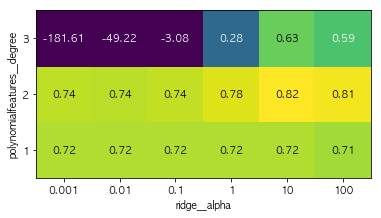

In [23]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                     xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                     xticklabels=param_grid['ridge__alpha'],
                     yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [24]:
print('최적의 매개변수: {}'.format(grid.best_params_))

최적의 매개변수: {'ridge__alpha': 10, 'polynomialfeatures__degree': 2}


In [25]:
print('테스트 점수: {:.3f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.767


In [27]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print('다항 특성이 없을 때 점수: {:.3f}'.format(grid.score(X_test, y_test)))

다항 특성이 없을 때 점수: 0.627


In [28]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {
        'classifier': [SVC()], 'preprocessing': [StandardScaler()],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'preprocessing': [None],
        'classifier__max_features': [1, 2, 3]
    }
]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print('최적의 매개변수:\n{}\n'.format(grid.best_params_))
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))
print('테스트 점수: {:.3f}'.format(grid.score(X_test, y_test)))

최적의 매개변수:
{'classifier__C': 10, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__gamma': 0.01}

최상의 교차 검증 점수: 0.986
테스트 점수: 0.979
